# Mini Project: Model Johnson&Johnson Quarterly Earnings per Share (EPS)

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [40]:
plt.rcParams['figure.figsize'] = (10, 7.5)

In [41]:
data = pd.read_csv(r"C:\Users\rokhs\OneDrive\Courses\Applied Time Series Analysis in Python\mini project - autoregressive model\jj.csv")
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


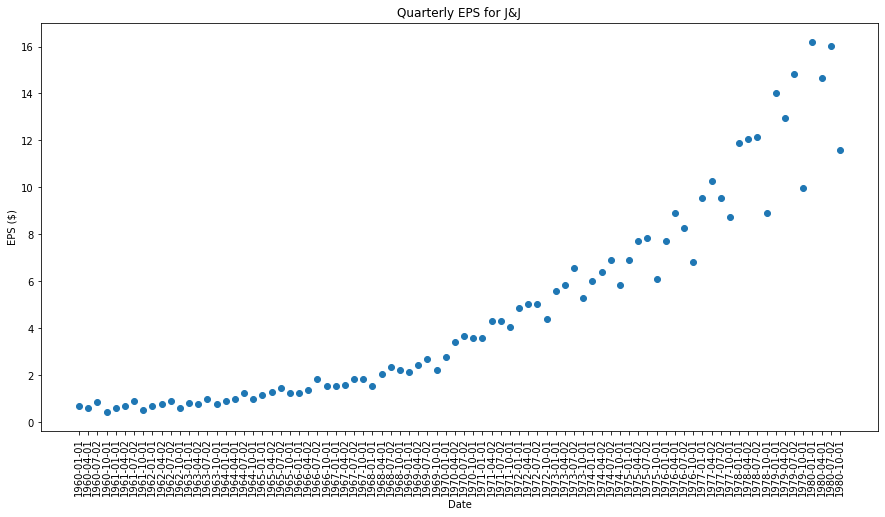

In [42]:
plt.figure(figsize=[15, 7.5])
plt.scatter(data['date'], data['data'])
plt.title('Quarterly EPS for J&J')
plt.ylabel('EPS ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

#####    Before we start modeling, we have to make the data "stationary". The data is not stationary in this case because we see an increase (there is a trend).

##### The transformation that we will apply to make this data set "stationary" is taking the log. 

In [43]:
# Take the log difference

data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])

data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


##### We plot the log difference data to check we are not having any trend anymore.

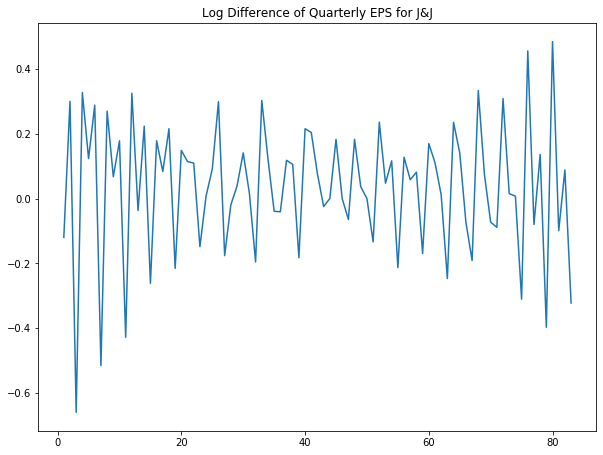

In [44]:
plt.plot(data['data'])
plt.title('Log Difference of Quarterly EPS for J&J')
plt.show()

##### Stationarity is both no trend and same variance. 
##### We test it statistically by using "Add fuller test";  the null hypothesis shows that the dataset is not stationary. 
##### If we run the Add fuller test and we get a P value less than 0.05, then we can reject the null hypothesis and assume that the time series is stationary.

In [45]:
ad_fuller_result = adfuller(data['data'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811833
p-value: 0.0004149731404440715


##### Now, we take a look at the ACF and PACF to see if we can derive the order of the AR process (or Ma process).

###### the PACF finds the correlation between the present value and the residuals at a previous lag. It finds a correlation that cannot be explained with the ACF function.

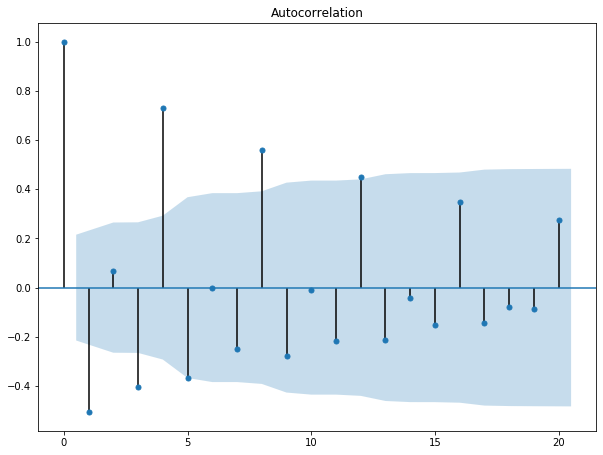

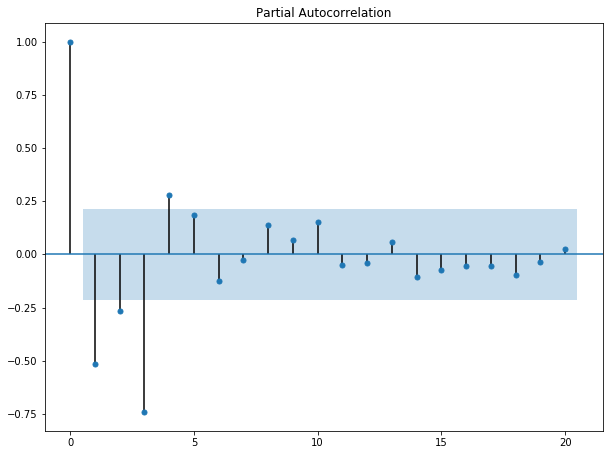

In [46]:
plot_acf(data['data']);
plot_pacf(data['data']);

##### we will try an AR model of order four (AR(4)).
##### Sigma is the variance of the simulated model.

In [47]:
rho, sigma = yule_walker(data['data'], 4)

print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [ 0.63642644  0.5364386   0.50578018 -0.27991345]
sigma: 0.11132979178317175


$ y_t = 0.63y_{t-1} + 0.53y_{t-2} + 0.50y_{t-3} - 0.27y_{t-4} $